# Classification

## 1. The basics

The only difference between regression and classification is that regression involves a continuous output variable whereas classification involeves a discrete output variable.

To keep things simple, we will only be considering the case where there are two possible values for the output variable, i.e. two *classes*, which we represent as 0 and 1. Strategies for *multiclass classification* is a separate logic.

All of the major concepts that we examined in the context of regression models apply to classification models:

- There different types of classifciation models including linear and nonlinear models (model specification). 
- Each classification model has free parameters that must be estimated from the data (model fitting).
- The accuracy of a classification model is typically expressed in terms of **percent correct**, i.e. percentage of data points correctly classified.
- Cross-valdation can be used to obtain unbiased accuracy estimates (model accuracy).
- Bootstrapping can be used to obtain error bars on model parameter estimates (model reliability).


To visualize classification, we can represent each data point as a dot in *n*-dimentional space (where *n* is the number of input variables) and color each dot to indicate the class assignment. The goal of classification is to construct a model that uses the input variables to predict the class assignment. This can be though of as drawing a line that separates the dots into groups that share the same color.

## 2. Linear classifiers

Linear classification models, or **linear classifiers**, are classification models where the separation between the two classes is expressed as a weighted sum of the input variables. 

For example, suppose we have input variables $x_i$ where $i$ ranges from $1$ to $n$. The prediction of a linear classifier is

$$
 y = \Big\{ 
 \begin{array}{ccc}
 0  if \sum^n_{i=1}w_ix_i<c\\
 1  if \sum^n_{i=1}w_ix_i<c\\
 \end{array}
$$


where $w_i$ is the weight on the $i-th$ input variable and $c$ is a constant. Notice that linear classifiers are identical to linear regression models up to a final thresholding operation that converts model outputs into one of two possible values. Also, note that in the formulation above, there is no need to add a constant regressor into the model since the flexibility of a constant regressor is already contained in the $c$ term.

The boundary that separates the two classes is called **decision  boundary**. For linear classifiers, the decision boundary is an $n$-dimensional **hyperplane**. THis is just a fancy term for the following concept: 

When $n=1$, there is one input variable and the decision boundary is a point. When $n=2$, there are two input variables and the decision boundary is a line. When $n=3#, there are three input variables, and the decision boundary is a plane. And so on.

There are various flavors of linear classifiers, including logistic regression, linear discriminant analysis (LDA), linear support vector machines (SVM), nearest-prototype classifiers, and Naive Bayes classifiers. All of these implement the same type of model (described above). However, different classifiers make different assumptions regarding the nature and distribution of the data, and therefore produce different estimates of the parameters of the linear classification model (the $w_i$ and $c$ terms above).

## 3. Nonlinear classifiers

Nonlinear classification models, or **nonlinear classifiers**, are classifiers that cannot be expressed in the form of a linear classifier.

The key characteristic of a nonlinear classifier is that the decision boundary can be nonlinear, that is, the decision boundary is not restricted to be a hyperplane. For example, for a two-dimensional input space, the decision boundary does not have to be a stright line but can instead be a curved line or even a circle.

A simple way to achieve nonlinear decision boundaries is to expand the input space by including nonlinear transformations of the original input variables and then fit a linear model in the expanded input space. The reason this works is that linear decision boundaries in the expanded input space may be nonlinear in the original space. Note that input expansion is the same strategy that underlies linearized regression models (Lecture 3).

There are various flavors of nonlinear classifiers, including classifiers based on a nonlinearly expanded input space (but which are otherwise linear), nonlinear support vector machines (SVM), and nearest-neighbor classifiers.

## 4. Details on several types of classifiers

### 4.1. Logistic regression

Logistic regression follows naturally from linear regression. The prediction of a logistic regression model is given by: 

$$
y = f\Big( \sum^n_{i=1}w_ix_i  \Big) , x_i - input, w_i - weights
$$



$$
f(a)=\frac{1}{1+e^{-a}}
$$

where $f(a)$ is a nonlinear function known as the **logistic function**. Note that a constant input variable should be explicitly included in the model. 

The only difference between a logistic regression model and a linear regression model is that the output is passed through the logistic function.

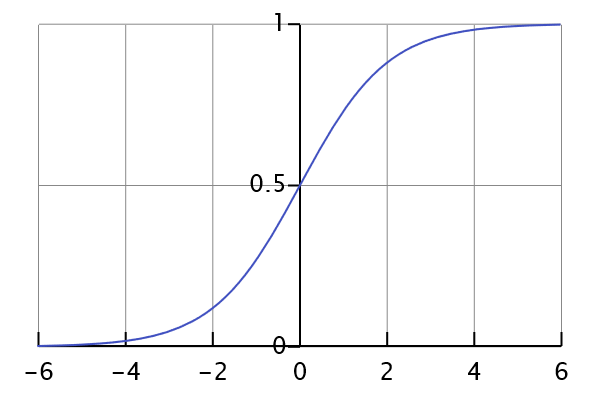

Note that the logistic function has a fixed slope in the transition region. Changing the level of steepness is achieved not in the logistic function itself but rather through appropriate scaling of the weights on the input variables. 

For example, doubling the weights on the input variables will result in increased steepness of the overall function output.

The logistic function produces values that lie between 0 and 1. This is nice because it allows us to interpret the output of the logistic regression model as a probability value, which then allows us to giva a probabilistic interpretation of the data. Specifically, we propose that the output variable is characterized by a **Bernoulli probability distribution** with success probability equal to the output of the model.

For example, let $y$ be the output of the logistic regression model. The likelihood that the output variable is 1 is $y$ and the likelihood that output variable is 0 is $1-y$.

Now that we have a probabilistic interpretation of the data, we can use maximum likelihood estimation to fit the parameters of the model (there $w_i$ terms). First, let's write out the likelihood of a given set of data:

$$
likelihood(d|m) = \prod^m_{j=1}p(d_j) = \prod^m_{j=1}\Big(y_j^{d_j}(1-y_j)^{1-d_j}\Big)
$$

where:

- $d$ represents the data
- $m$ represents the model
- $n$ is the number of data points
- $d_j$ is the $j$-th data point (whose value is 0 or 1)
- $y_j$ is the output of the model for the $j$-th data point

Computing the negative-log-likehood, we obtain:

$$
negative-log-likelihood(d|m) = - \sum^m_{j=1}\Big(d_jlog(y_j)+(1-d_j)log(1-y_j)\Big)
$$

Finally, we determine the parameters that minimize the negative-log-likelihood using optimization techniques.

The predicted class assignment for a given data point is determined by computing the output of the model.
- If the output is >= 0.5, class 1 is most likely and so that is our prediction. 
- If the output is < 0.5, class 0 is most likely and so that is our prediction.

### 4.1. Linear discriminant analysis (LDA)

In linear discriminant analysis (LDA), we first model the distribution of the two class before determining the decision boundary. 

A very specific model is posed: we assume that the two classes are characterized by **multivariate Gaussian distributions** with equal covariances (but unequal means).

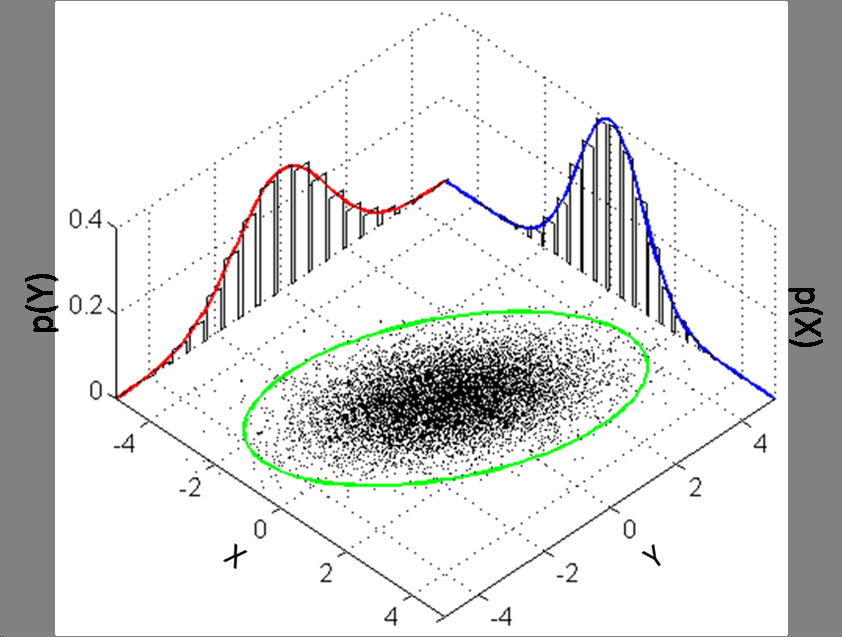

After estimating the means of the two distributions and the common covariance of the distributions, the decision boundary that optimally separates the distributions is derived. 

This decision boundary turns out to be linear in nature.

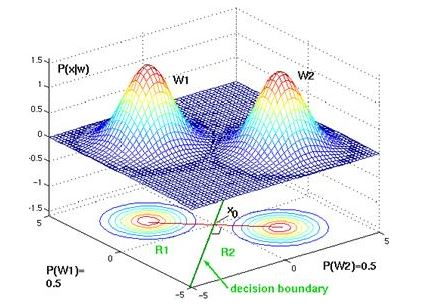

 - When its aassumtions are met, LDA provides good classification performance. If the assumptions are not met, other classifiers may be preferable.
 - LDA is called a **generative** classifier because it motels the distributions of the two classes (and can therefore generate samples from each class). In contrast, logistic regression and SVM are called **discriminative** classifiers because they directly determine the decision boundary without bothering to model the class distributions.


### 4.3. Support vector machines (SVM)

Support vector machines (SVM) is a powerful technique that performs especially well for high-dimensional problems (i.e. problems where there are many input variables compared to data points). 

The key concept in SVM is **maximizing the margin**, that is, maximizing the distance between the decision boundary and the nearest data points in the sample. The idea is that a good decision boundary is not just one that successfully classifies the data points but also one that maximizes the margin, as this will likely generalzie well to novel data.

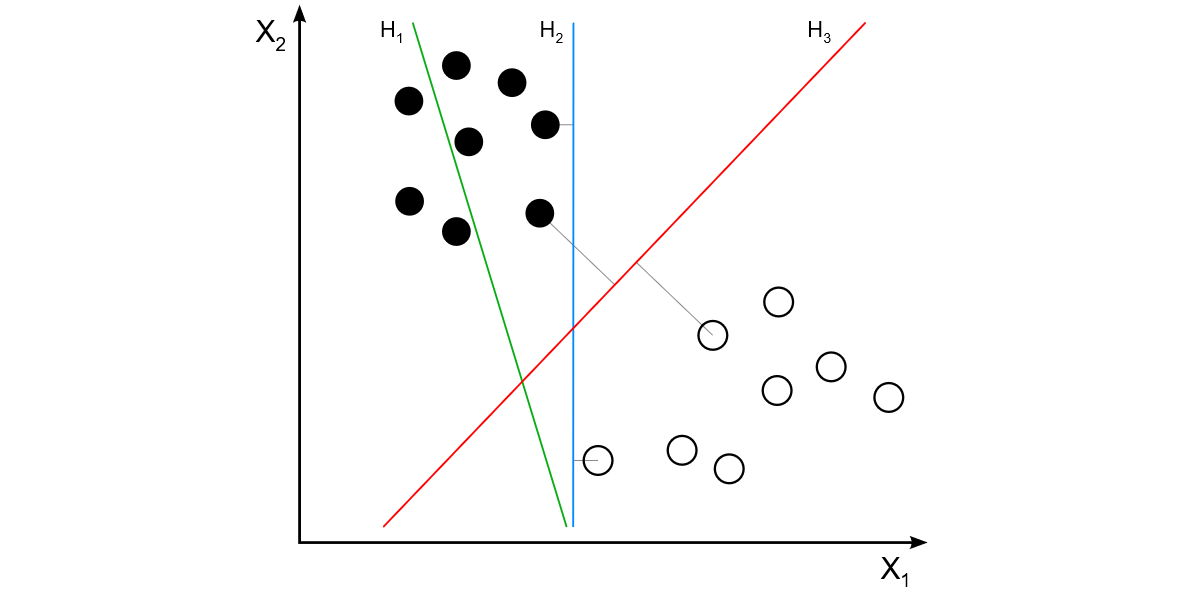

There are bot linear and nonlinear versions of SVM. Nonlinearity is achieved through the **kernel trick**. The kernel trick achieves the same result as nonlinear expansion of the input space but avoids actual construction of the higher-dimensional space.

### 4.4. Nearest prototype classifiers

Nearest-prototype classification is a simple yet effective technique.

For each class, we compute the **centroid** of the data points in the sample that are assigned to that class, i.e. the point whose coordinates are given by the mean of each input variable. The centroid can be thought as a **prototype** for the class.

To predict the class assignment for a new data point, we simply choose the class associated with the centroid that is nearest to the data point.

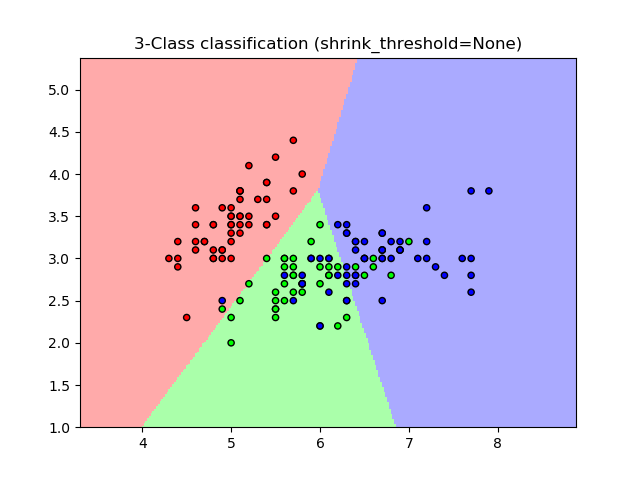

When computing distance, a distance metric is necessary. The metric of Euclidean distance is natural but alternatives such as correlation can be used.

Nearest-prototype classification is quite flexible as it makes few assumptions regarding the underlying model. However, it does allow only linear decision boundaries (assuming that a Euclidean distance metric is used).

A variation that may be useful for non-Gaussian data is to use the median instead of the mean when computing centroids.

### 4.5. Nearest-neighbor classifiers

In this simple yet powerful technique, the predicted class assignment for a new data point is simply the class associated with the nearest data point in the sample.

Nearest-neighbor classification makes few assumptions regarding the underlying model, and can generate noonlinear decision boundaries.

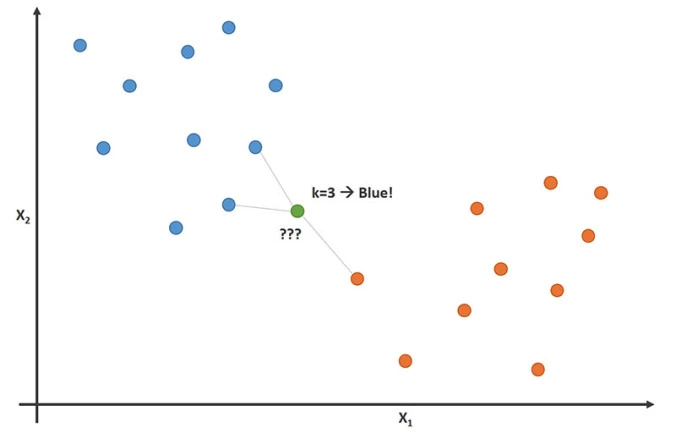

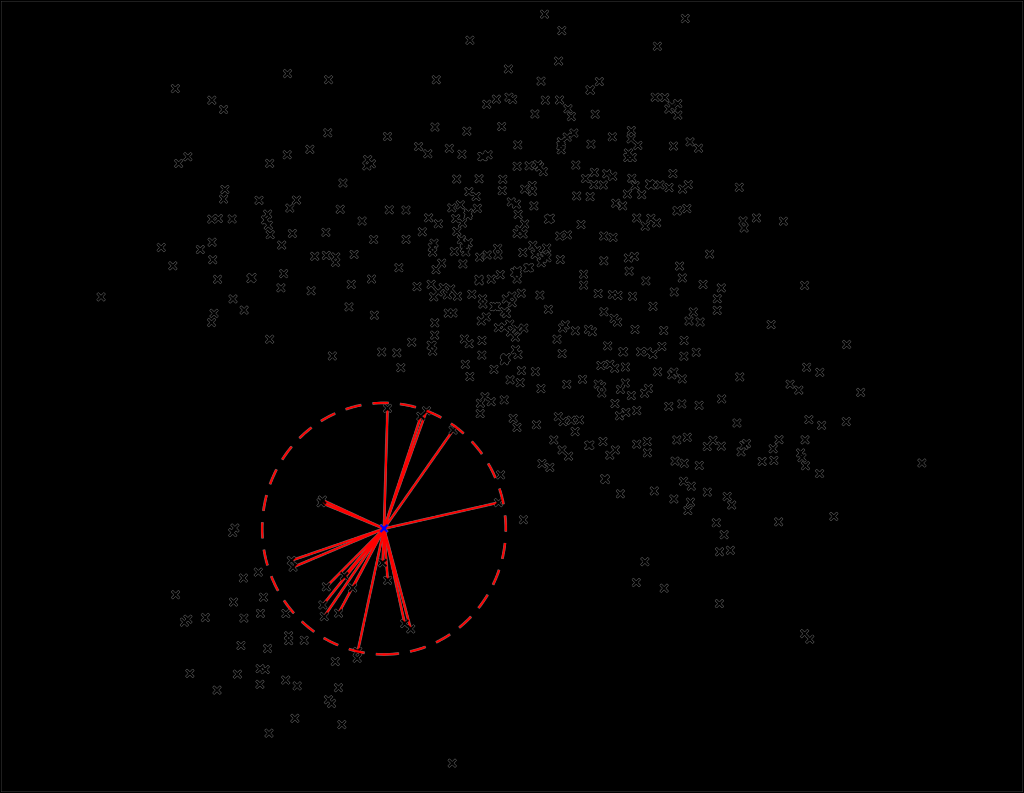

A potential disadvantage of nearest-neighbor classifiers is that they may be too sensitive to noise in the data. A variation that may improve performance is **k-nearest neighbor classification**, where the predicted class assignment is based on a majority vote from the *k* nearest data points. Averaging across nearby data points reductes the impact of noise on the predicted class assignment.

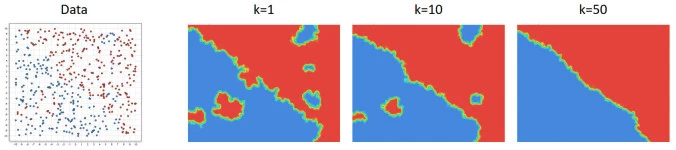